In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# y="episode_reward/episode_reward"
# y="success_rate/success_rate"

plot_data = []
AC_df = pd.read_csv("AC_progress")
TD3_df = pd.read_csv("td3_progress")
PPO_df = pd.read_csv("ppo_progress")

In [14]:
AC_df.head()

,Unnamed: 0,log_dir,frame_per_second,episode_reward,total_steps,total_episodes,total_time,target_q,actor_loss,critic_loss,success_rate,current_q1,reward
0,0,MetaDrive-Tut-Hard-v0,704,5.162734,1428,2,2.028312,NaN,NaN,NaN,0.0,NaN,NaN
1,1,MetaDrive-Tut-Hard-v0,761,2.789586,2404,4,3.157796,NaN,NaN,NaN,0.0,NaN,NaN
2,2,MetaDrive-Tut-Hard-v0,777,4.075364,3405,5,4.378556,NaN,NaN,NaN,0.0,NaN,NaN
3,3,MetaDrive-Tut-Hard-v0,717,5.123336,4406,6,6.144996,NaN,NaN,NaN,0.0,NaN,NaN
4,4,MetaDrive-Tut-Hard-v0,737,5.736588,5407,7,7.330042,NaN,NaN,NaN,0.0,NaN,NaN


In [15]:
# AC_df
for index, row in AC_df.iterrows():
    plot_data.append({
        'value': row['episode_reward'],
        'total_episodes': row['total_episodes'],
        'label': 'AC'
    })

'''
# PPO_df
for index, row in PPO_df.iterrows():
    plot_data.append({
        'value': row['episode_reward'],
        'total_episodes': row['total_episodes'],
        'label': 'PPO'
    }) 
'''

# TD3_df
for index, row in TD3_df.iterrows():
    plot_data.append({
        'value': row['episode_reward'],
        'total_episodes': row['total_episodes'],
        'label': 'TD3'
    })

plot_data = pd.DataFrame(plot_data)

In [16]:
plot_data

,value,total_episodes,label
0,5.162734,2,AC
1,2.789586,4,AC
2,4.075364,5,AC
3,5.123336,6,AC
4,5.736588,7,AC
...,...,...,...
193,227.088248,644,TD3
194,229.320093,648,TD3
195,233.582745,651,TD3
196,235.135659,653,TD3


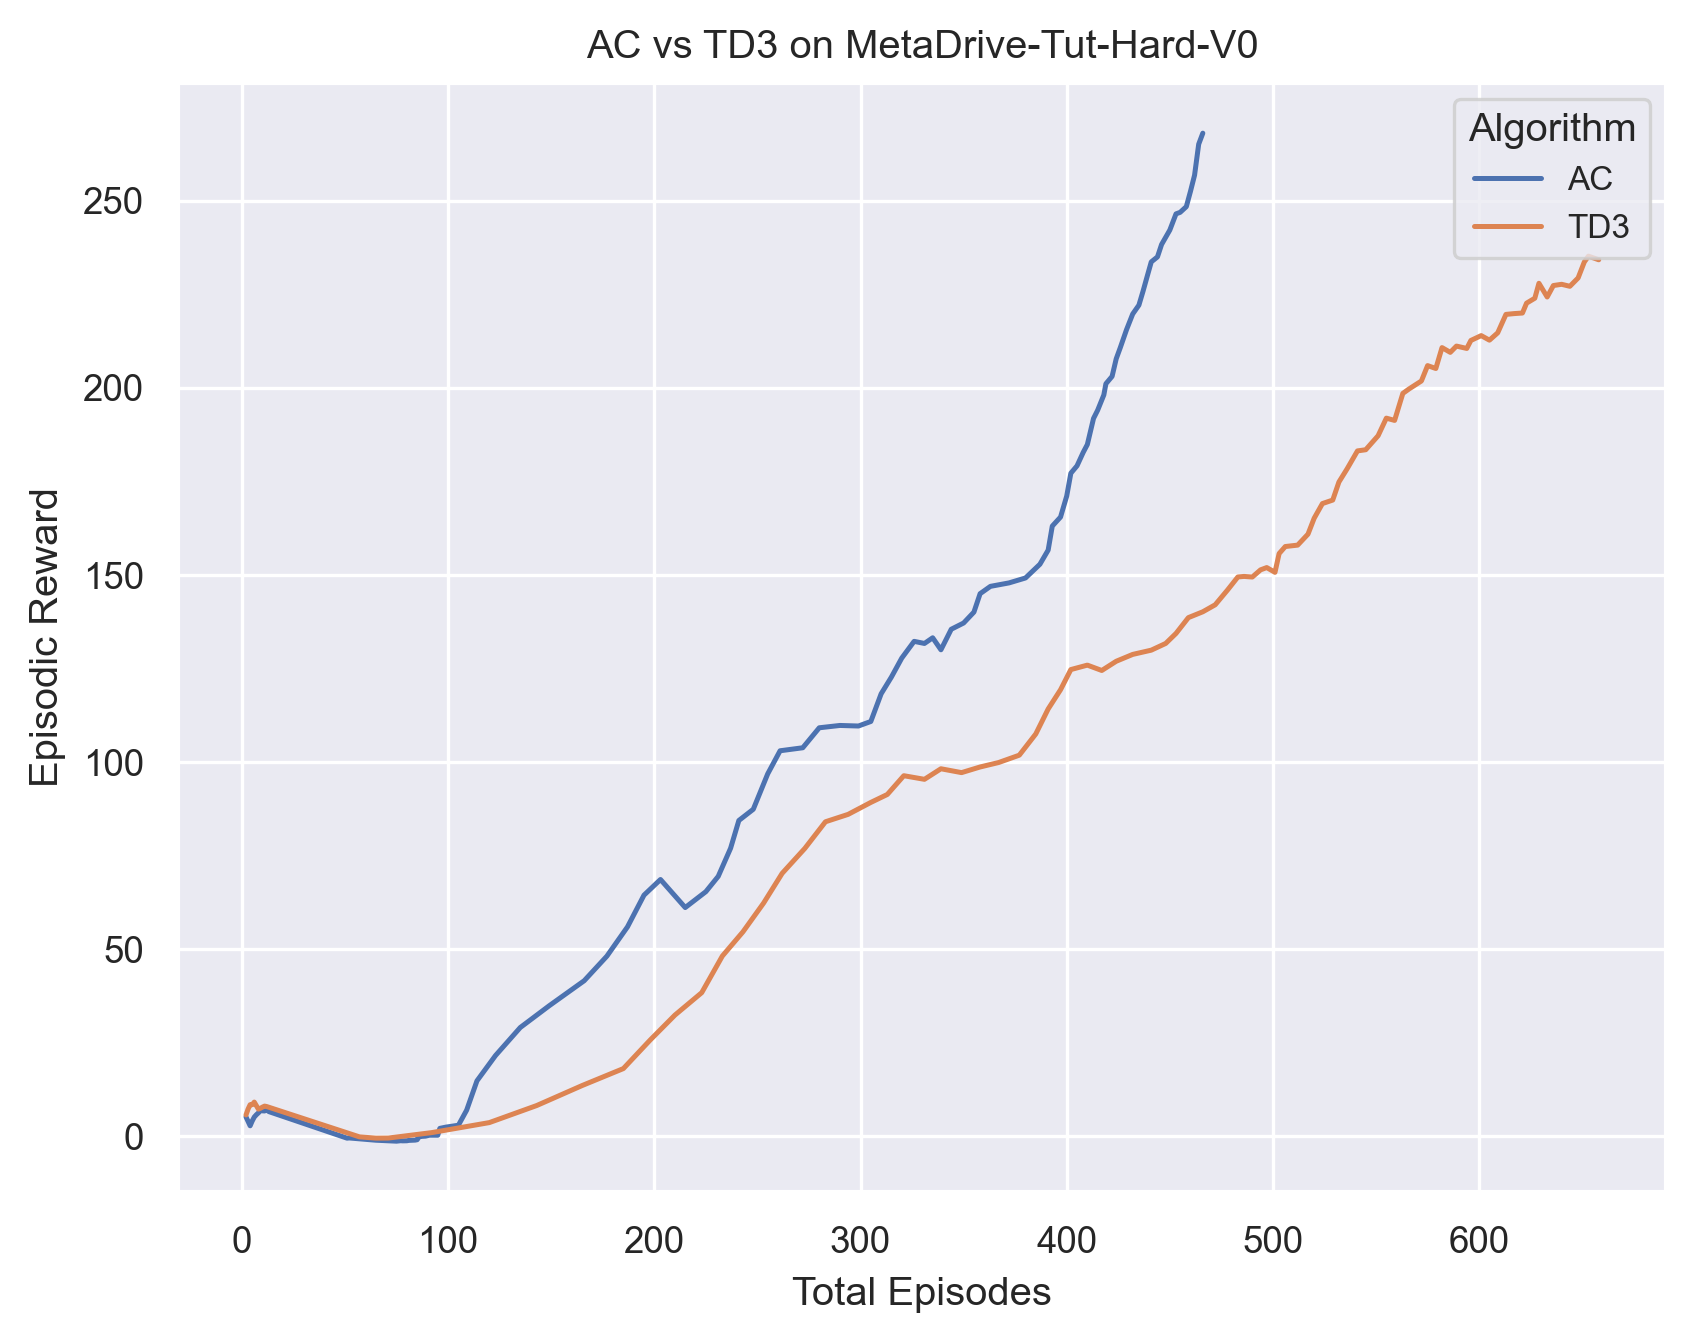

In [17]:
plt.figure(dpi=300)
sns.set("paper", style="darkgrid")

# Plot
ax = sns.lineplot(
    data=plot_data,
    x='total_episodes',
    y='value',
    hue='label'
)

# Set the plot title and labels
ax.set_title('AC vs TD3 on MetaDrive-Tut-Hard-V0')
ax.set_xlabel('Total Episodes')
ax.set_ylabel('Episodic Reward')

# Set the legend
ax.legend(title='Algorithm', fontsize=8, loc='upper right')

# Save the plot
plt.savefig('generalization.png', format='png', dpi=300, bbox_inches="tight")